# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
!pip install xgboost

In [0]:
!unzip donar_choose_data.zip

Archive:  donar_choose_data.zip
   creating: donar_choose_data/
  inflating: donar_choose_data/resources.csv  
  inflating: donar_choose_data/train_data.csv  


In [0]:
!ls /content/donar_choose_data.zip

/content/donar_choose_data.zip


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('donar_choose_data/train_data.csv')
resource_data = pd.read_csv('donar_choose_data/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    sent = decontracted(sentance)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:49<00:00, 2209.41it/s]


In [0]:
## storing these pre-processed in the dataframe
project_data["preprocessed_essays"]= preprocessed_essays
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays, cognitive delays, gross/fine motor delays, autism. they eager beavers always strive work hardest working past limitations. \\r\\n\\r\\nthe materials ones i seek students. i teach title i school students receive free reduced price lunch. despite disabilities limitations, students love coming school come eager learn explore.have ever felt like ants pants needed groove move meeting? this kids feel time. the want able move learn say.wobble chairs answer i love develop core, enhances gross motor turn fine motor skills. \\r\\nthey also want learn games, kids not want sit worksheets. they want learn count jumping playing. physical engagement key success. the number toss color shape mats make happen. my students forget work fun 6 year old deserves.nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_project_title = []
for sentance in tqdm(project_data['project_title'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    sent = decontracted(sentance)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())
    
project_data["preprocessed_project_title"]= preprocessed_project_title

100%|██████████| 109248/109248 [00:02<00:00, 41076.89it/s]


## 1.4.1 Preprocessing project_grade_categories

In [0]:
def replace_chars(string):
    string =string.replace(" ","_")
    string =string.replace("-","_")
    return string

project_data["project_grade_category"] = project_data["project_grade_category"].apply(replace_chars)

### Adding new features "essays_word_count" & "title_word_count"

In [0]:
project_data["essays_word_count"] = project_data['preprocessed_essays'].str.count(" ")+1
project_data["title_word_count"] = project_data["preprocessed_project_title"].str.count(" ")+1

### Computing Sentiment Scores

In [0]:
# for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
# for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
# of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
# for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
# learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
# in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
# mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
# montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
# in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
# and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
# food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
# of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
# nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
# and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
# shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
# nannan'

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93


In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def calculate_sentiment_scores(string):
    ss = sid.polarity_scores(string)
    return ss["neg"], ss["neu"], ss["pos"], ss["compound"]
  
#https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns
project_data["neg_score"], project_data["neu_score"], project_data["pos_score"], project_data["compound_score"] = \
                                                              zip(*project_data["preprocessed_essays"].map(calculate_sentiment_scores))


## Train test (stratified) split 

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
try:
    y_train = project_data["project_is_approved"]
    project_data.drop(columns=["project_is_approved"],inplace=True)
except:
    pass

In [0]:
x_train , x_test, y_train, y_test = train_test_split(project_data, y_train, stratify=y_train, test_size=0.2, random_state=28)
x_train , x_val, y_train, y_val  = train_test_split(x_train, y_train, stratify=y_train, test_size=0.25, random_state=28)

In [0]:
# maintain copy
project_data_copy = project_data.copy()
y_train_copy=y_train.copy()
project_data.head(2)
#x_val.head(1)
#x_test.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_project_title,essays_word_count,title_word_count,neg_score,neu_score,pos_score,compound_score,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades_PreK_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,my students english learners working english s...,educational support english learners home,156,5,0.013,0.856,0.131,0.9595,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,our students arrive school eager learn. they p...,wanted: projector hungry learners,113,4,0.048,0.675,0.277,0.9853,299.0,1


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'preprocessed_essays',
       'preprocessed_project_title', 'essays_word_count', 'title_word_count',
       'neg_score', 'neu_score', 'pos_score', 'compound_score', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data - Response Encoding

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

In [0]:
categorical_features=[]

In [0]:
class response_encoder:
    def __init__(self):        
        pass

    def fit(self,x,y,column_name):
        """
        Input: 'x'=Series, Data that you wanted to encode on target 'y'=Series  and "column_name": name of the column on which we do encoding.
        Output: Dataframe with k columns , where k= unique class labels in y
        """
        self.x=x
        self.y=y
        self.column_name=column_name
        self.response_table = []
        
        """code for creating response_table"""
        # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html        
        dummies = pd.get_dummies(y, prefix=''+column_name)
        # https://stackoverflow.com/questions/23891575/how-to-merge-two-dataframes-side-by-side
        self.response_table = pd.concat([pd.DataFrame({column_name:x}), dummies], axis=1)
        self.response_table = self.response_table.groupby(column_name).sum()        
        self.response_table["total"] = self.response_table.apply(lambda row: \
                                                     sum([row[col_name] for col_name in self.response_table.columns[:]]), axis=1)        
        #display(self.response_table)
    
    def transform(self,x):
        """
        NOTE: Works only after fitting data using classObject.fit(x,y,column_name) &
        then, it do response encoding from the fitted data on given input 'x'.
        Input : "x":The data which is to be encoded
        Output : response encoded data
        """
        # maintain a dict, with unique class_labels as keys, then finally convert into Dataframe
        res={}
        y=self.y
        
        # if item is not seen in fitted data, then assign uniform probability
        unseen_item_prob = round(1/len(y.unique()),2)        
        
        for class_label in y.unique():
            res[self.column_name+"_"+str(class_label)] = []
        #print(res)
        
        for item in x:
            try:
                for class_label in y.unique():
                    res[self.column_name+"_"+str(class_label)].append(self.response_table[self.column_name+"_"+str(class_label)][item] / \
                                                                                    self.response_table["total"][item] )
            except:
                for class_label in y.unique():
                    res[self.column_name+"_"+str(class_label)].append(unseen_item_prob)        
        
        #self.encoded_data= pd.DataFrame(res)
        return pd.DataFrame(res)
    
    def fit_transform(self, x, y, column_name):
        """
        Input: 'x'=Series, Data that you wanted to encode on target 'y'=Series  and "column_name": name of the column on which we do encoding.
        Performs both fit and transform, if params are passed and returns a response_encoded data        
        """
        self.fit(x,y,column_name)
        return self.transform(x)
    
    def get_feature_names(self):
        """
        returns features names, after fitting the data.
        """
        return self.response_table.columns[:-1]
        

In [0]:
%%time
encoder = response_encoder()

#clean_categories
encoder.fit(x_train["clean_categories"], y_train, "clean_categories")
categories_x_train = encoder.transform(x_train["clean_categories"])
categories_x_val = encoder.transform(x_val["clean_categories"])
categories_x_test = encoder.transform(x_test["clean_categories"])
categorical_features.extend(encoder.get_feature_names())


#clean_subcategories
subcategories_x_train = encoder.fit_transform(x_train["clean_subcategories"], y_train, "clean_subcategories")
subcategories_x_val = encoder.transform(x_val["clean_subcategories"])
subcategories_x_test = encoder.transform(x_test["clean_subcategories"])
categorical_features.extend(encoder.get_feature_names())


#school_state
school_state_x_train = encoder.fit_transform(x_train["school_state"], y_train, "school_state")
school_state_x_val = encoder.transform(x_val["school_state"])
school_state_x_test = encoder.transform(x_test["school_state"])
categorical_features.extend(encoder.get_feature_names())


#teacher_prefix 
teacher_prefix_x_train = encoder.fit_transform(x_train["teacher_prefix"], y_train, "teacher_prefix")
teacher_prefix_x_val = encoder.transform(x_val["teacher_prefix"])
teacher_prefix_x_test = encoder.transform(x_test["teacher_prefix"])
categorical_features.extend(encoder.get_feature_names())


#project_grade_category
project_grade_category_x_train = encoder.fit_transform(x_train["project_grade_category"], y_train, "project_grade_category")
project_grade_category_x_val = encoder.transform(x_val["project_grade_category"])
project_grade_category_x_test = encoder.transform(x_test["project_grade_category"])
categorical_features.extend(encoder.get_feature_names())


CPU times: user 4min 18s, sys: 7.9 s, total: 4min 26s
Wall time: 4min 26s


### 1.5.2 Vectorizing Text data

In [0]:
bow_essay_features=[]
bow_project_title_features=[]

tfidf_essay_features=[]
tfidf_project_title_features=[]

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# for essays
vectorizer = CountVectorizer(min_df=10, stop_words= "english")
#train data
text_bow_x_train = vectorizer.fit_transform(x_train["preprocessed_essays"])
#val_data
text_bow_x_val = vectorizer.transform(x_val["preprocessed_essays"])
#test_data
text_bow_x_test = vectorizer.transform(x_test["preprocessed_essays"])
print("Shape of matrix after one hot encoding ",text_bow_x_train.shape)

bow_essay_features = vectorizer.get_feature_names()

Shape of matrix after one hot encoding  (65548, 13832)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# for project_title
vectorizer = CountVectorizer(min_df=6, stop_words= "english")
#train data
project_title_bow_x_train = vectorizer.fit_transform(x_train["preprocessed_project_title"])
#validation data
project_title_bow_x_val = vectorizer.transform(x_val["preprocessed_project_title"])
#test_data
project_title_bow_x_test = vectorizer.transform(x_test["preprocessed_project_title"])
print("Shape of matrix after one hot encodig ",project_title_bow_x_train.shape)

bow_project_title_features= vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (65548, 3267)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, stop_words= "english")
#train_data
text_tfidf_x_train = vectorizer.fit_transform(x_train["preprocessed_essays"])
#validation data
text_tfidf_x_val = vectorizer.transform(x_val["preprocessed_essays"])
#test_data
text_tfidf_x_test = vectorizer.transform(x_test["preprocessed_essays"])

print("Shape of matrix after one hot encoding ",text_tfidf_x_train.shape, text_tfidf_x_test.shape)

tfidf_essay_features = vectorizer.get_feature_names()

Shape of matrix after one hot encoding  (65548, 13832) (21850, 13832)


In [0]:
vectorizer = TfidfVectorizer(min_df=6, stop_words= "english")
#train data
project_title_tfidf_x_train = vectorizer.fit_transform(x_train["preprocessed_project_title"])
#validation data
project_title_tfidf_x_val = vectorizer.transform(x_val["preprocessed_project_title"])
#test_data
project_title_tfidf_x_test = vectorizer.transform(x_test["preprocessed_project_title"])

print("Shape of matrix after one hot encodig ",project_title_tfidf_x_train.shape, project_title_tfidf_x_test.shape)

tfidf_project_title_features = vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (65548, 3267) (21850, 3267)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
#@title
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
#@title
# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# # make sure you have the glove_vectors file
# with open('glove_vectors', 'rb') as f:
#     model = pickle.load(f)
#     glove_words =  set(model.keys())

In [0]:
#Word2vec is given with all the training data
all_data =  list(map(lambda x:x.split() , list(x_train["preprocessed_essays"])+list(x_train["preprocessed_project_title"]) ))
word2vec = Word2Vec(all_data, min_count=2, size=100, sg=0, workers=3)#cbow

# average Word2Vec
# compute average word2vec for each review.
def get_avg_w2v_vectors(preprocessed_essays):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(100) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence            
            try:
                vector += word2vec.wv[word]
            except:
                pass
            cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return np.array(avg_w2v_vectors).reshape(-1,100)
    
# vectorize preprocessed_essays using avg-word2vec
avg_w2v_text_x_train = get_avg_w2v_vectors(x_train["preprocessed_essays"])
avg_w2v_text_x_val = get_avg_w2v_vectors(x_val["preprocessed_essays"])
avg_w2v_text_x_test = get_avg_w2v_vectors(x_test["preprocessed_essays"])

# Similarly you can vectorize for project_title also
avg_w2v_project_title_x_train = get_avg_w2v_vectors(x_train["preprocessed_project_title"])
avg_w2v_project_title_x_val = get_avg_w2v_vectors(x_val["preprocessed_project_title"])
avg_w2v_project_title_x_test = get_avg_w2v_vectors(x_test["preprocessed_project_title"])

100%|██████████| 21850/21850 [00:00<00:00, 38598.71it/s]


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train["preprocessed_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def get_tfidf_w2v_vectors(preprocessed_essays):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(100) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            try:
                vec += word2vec.wv[word]
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
            except:
                pass
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return np.array(tfidf_w2v_vectors).reshape(-1,100)
  
# preprocessing essays, using TFIDF-W2V 
tfidf_w2v_text_x_train = get_tfidf_w2v_vectors(x_train["preprocessed_essays"])
tfidf_w2v_text_x_val = get_tfidf_w2v_vectors(x_val["preprocessed_essays"])
tfidf_w2v_text_x_test = get_tfidf_w2v_vectors(x_test["preprocessed_essays"])

100%|██████████| 21850/21850 [00:01<00:00, 16508.36it/s]


In [0]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train["preprocessed_project_title"])
dictionary = dict(zip(tfidf_model.get_feature_names(), tfidf_model.idf_))
tfidf_words = dictionary.keys()

# average Word2Vec
# compute average word2vec for each project_title.
def get_tfidf_w2v_project_title_vectors(preprocessed_project_title):
    tfidf_w2v_project_title_vectors = [];
    for sentence in tqdm(preprocessed_project_title):
        vector= np.zeros(100)
        tf_idf_weight =0
        for word in sentence.split(): 
            if (word in word2vec.wv.vocab) and (word in tfidf_words):               
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (word2vec.wv[word] * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_project_title_vectors.append(vector)
    return np.array(tfidf_w2v_project_title_vectors).reshape(-1,100)
   
tfidf_w2v_project_title_x_train = get_tfidf_w2v_project_title_vectors(x_train["preprocessed_project_title"])
tfidf_w2v_project_title_x_val = get_tfidf_w2v_project_title_vectors(x_val["preprocessed_project_title"])
tfidf_w2v_project_title_x_test = get_tfidf_w2v_project_title_vectors(x_test["preprocessed_project_title"])

100%|██████████| 21850/21850 [00:00<00:00, 26051.67it/s]


### 1.5.3 Vectorizing Numerical features

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)


# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler, Normalizer
#This function return the normalized data.
def standardize_data(x_train, x_val, x_test, column):   
    scalar = StandardScaler()
    scalar.fit(x_train[column].values.reshape(-1,1))
    std_scalar_x_train = scalar.transform(x_train[column].values.reshape(-1,1))
    std_scalar_x_val = scalar.transform(x_val[column].values.reshape(-1,1))
    std_scalar_x_test = scalar.transform(x_test[column].values.reshape(-1,1))
    return std_scalar_x_train, std_scalar_x_val, std_scalar_x_test


In [0]:
price_standardized_x_train, price_standardized_x_val, price_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "price")

quantity_standardized_x_train, quantity_standardized_x_val, quantity_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "quantity")

teacher_prev_projects_standardized_x_train, teacher_prev_projects_standardized_x_val, teacher_prev_projects_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "teacher_number_of_previously_posted_projects")

#################### Newly added features
essaywc_standardized_x_train, essaywc_standardized_x_val, essaywc_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "essays_word_count")

titlewc_standardized_x_train, titlewc_standardized_x_val, titlewc_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "title_word_count")

neg_standardized_x_train, neg_standardized_x_val, neg_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "neg_score")

neu_standardized_x_train, neu_standardized_x_val, neu_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "neu_score")

pos_standardized_x_train, pos_standardized_x_val, pos_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "pos_score")

compound_standardized_x_train, compound_standardized_x_val, compound_standardized_x_test = \
                                        standardize_data(x_train, x_val, x_test, "compound_score")

In [0]:
# school_state_x_train, categories_x_train, sub_categories_x_train,\
# project_grade_category_x_train, teacher_prefix_x_train,\

# quantity_standardized_x_train, teacher_prev_projects_standardized_x_train, price_standardized_x_train,\
# neg_standardized_x_train, neu_standardized_x_train, pos_standardized_x_train, compound_standardized_x_train,\
# titlewc_standardized_x_train, essaywc_standardized_x_train


numerical_features = ["quantity", "teacher_prev_projects", "price"]
                     #, "essay_wordcount", "neg_sentiment_score" ,"neu_sentiment_score",
                     #"pos_sentiment_score", "compound_score", "title_wordcount", "essay_wordcount"]

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_x_train.shape)
print(subcategories_x_train.shape)
print(school_state_x_train.shape)
print(teacher_prefix_x_train.shape)
print(project_grade_category_x_train.shape)

print(text_bow_x_train.shape)
print(project_title_bow_x_train.shape)

print(text_tfidf_x_train.shape)
print(project_title_tfidf_x_train.shape)

print(avg_w2v_text_x_train.shape)
print(avg_w2v_project_title_x_train.shape)

print(tfidf_w2v_text_x_train.shape)
print(tfidf_w2v_project_title_x_train.shape)

print("")

print(quantity_standardized_x_train.shape , essaywc_standardized_x_test.shape)

(65548, 2)
(65548, 2)
(65548, 2)
(65548, 2)
(65548, 2)
(65548, 13832)
(65548, 3267)
(65548, 13832)
(65548, 3267)
(65548, 100)
(65548, 100)
(65548, 100)
(65548, 100)

(65548, 1) (21850, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack, vstack 

#set1 =  [categorical, numerical, project_title(BOW) , preprocessed_essay (BOW)]
X_train_set1 = hstack((school_state_x_train, categories_x_train, subcategories_x_train,\
            teacher_prefix_x_train, project_grade_category_x_train,\
            price_standardized_x_train, teacher_prev_projects_standardized_x_train, quantity_standardized_x_train, \
            project_title_bow_x_train, text_bow_x_train))

X_val_set1 = hstack((school_state_x_val, categories_x_val, subcategories_x_val,\
            teacher_prefix_x_val, project_grade_category_x_val,\
            price_standardized_x_val, teacher_prev_projects_standardized_x_val, quantity_standardized_x_val, \
            project_title_bow_x_val, text_bow_x_val))

X_test_set1 = hstack((school_state_x_test, categories_x_test, subcategories_x_test,\
            teacher_prefix_x_test, project_grade_category_x_test,\
            price_standardized_x_test, teacher_prev_projects_standardized_x_test, quantity_standardized_x_test, \
            project_title_bow_x_test, text_bow_x_test))

print("x_train {0} | y_train {1} ".format(X_train_set1.shape , y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set1.shape , y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set1.shape , y_test.shape))

x_train (65548, 17112) | y_train (30000,) 
x_val (21850, 17112) | y_train (10000,) 
x_test  (21850, 17112) | y_test  (10000,) 


In [0]:
X_train_set2 = hstack((school_state_x_train, categories_x_train, subcategories_x_train,\
            teacher_prefix_x_train, project_grade_category_x_train,\
            price_standardized_x_train, teacher_prev_projects_standardized_x_train, quantity_standardized_x_train, \
            project_title_tfidf_x_train , text_tfidf_x_train ))

X_val_set2 = hstack((school_state_x_val, categories_x_val, subcategories_x_val,\
            teacher_prefix_x_val, project_grade_category_x_val,\
            price_standardized_x_val, teacher_prev_projects_standardized_x_val, quantity_standardized_x_val, \
            project_title_tfidf_x_val, text_tfidf_x_val))

X_test_set2 = hstack((school_state_x_test, categories_x_test, subcategories_x_test,\
            teacher_prefix_x_test, project_grade_category_x_test,\
            price_standardized_x_test, teacher_prev_projects_standardized_x_test, quantity_standardized_x_test, \
            project_title_tfidf_x_test, text_tfidf_x_test))

print("x_train {0} | y_train {1} ".format(X_train_set2.shape , y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set2.shape , y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set2.shape , y_test.shape))

x_train (65548, 17112) | y_train (30000,) 
x_val (21850, 17112) | y_train (10000,) 
x_test  (21850, 17112) | y_test  (10000,) 


In [0]:
X_train_set3 = hstack((school_state_x_train, categories_x_train, subcategories_x_train,\
            teacher_prefix_x_train, project_grade_category_x_train,\
            price_standardized_x_train, teacher_prev_projects_standardized_x_train, quantity_standardized_x_train, \
            avg_w2v_project_title_x_train, avg_w2v_text_x_train))

X_val_set3 = hstack((school_state_x_val, categories_x_val, subcategories_x_val,\
            teacher_prefix_x_val, project_grade_category_x_val,\
            price_standardized_x_val, teacher_prev_projects_standardized_x_val, quantity_standardized_x_val, \
            avg_w2v_project_title_x_val, avg_w2v_text_x_val))

X_test_set3 = hstack((school_state_x_test, categories_x_test, subcategories_x_test,\
            teacher_prefix_x_test, project_grade_category_x_test,\
            price_standardized_x_test, teacher_prev_projects_standardized_x_test, quantity_standardized_x_test, \
            avg_w2v_project_title_x_test, avg_w2v_text_x_test))

print("x_train {0} | y_train {1} ".format(X_train_set3.shape , y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set3.shape , y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set3.shape , y_test.shape))

x_train (65548, 213) | y_train (30000,) 
x_val (21850, 213) | y_train (10000,) 
x_test  (21850, 213) | y_test  (10000,) 


In [0]:
X_train_set4 = hstack((school_state_x_train, categories_x_train, subcategories_x_train,\
            teacher_prefix_x_train, project_grade_category_x_train,\
            price_standardized_x_train, teacher_prev_projects_standardized_x_train, quantity_standardized_x_train, \
            tfidf_w2v_project_title_x_train, tfidf_w2v_text_x_train))

X_val_set4 = hstack((school_state_x_val, categories_x_val, subcategories_x_val,\
            teacher_prefix_x_val, project_grade_category_x_val,\
            price_standardized_x_val, teacher_prev_projects_standardized_x_val, quantity_standardized_x_val, \
            tfidf_w2v_project_title_x_val, tfidf_w2v_text_x_val))

X_test_set4 = hstack((school_state_x_test, categories_x_test, subcategories_x_test,\
            teacher_prefix_x_test, project_grade_category_x_test,\
            price_standardized_x_test, teacher_prev_projects_standardized_x_test, quantity_standardized_x_test, \
            tfidf_w2v_project_title_x_test, tfidf_w2v_text_x_test))

print("x_train {0} | y_train {1} ".format(X_train_set4.shape , y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set4.shape , y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set4.shape , y_test.shape))

x_train (65548, 213) | y_train (30000,) 
x_val (21850, 213) | y_train (10000,) 
x_test  (21850, 213) | y_test  (10000,) 


# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
#@title
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
#@title
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
#@title
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>
SET1 : categorical, numerical features + project_title(BOW) + preprocessed_eassay(BOW)

In [0]:
# Please write all the code with proper documentation
print("x_train {0} | y_train {1} ".format(X_train_set1.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set1.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set1.shape, y_test.shape))

x_train (65548, 17112) | y_train (65548,) 
x_val (21850, 17112) | y_train (21850,) 
x_test  (21850, 17112) | y_test  (21850,) 


#### 2.4.1.1 Finding optimal hyperparameters on SET1

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
train_scores1=[]
val_scores1=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        rf_model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, class_weight="balanced", random_state=28)
        rf_model.fit(X_train_set1, y_train)
        
        y_train_pred = rf_model.predict(X_train_set1)
        y_val_pred = rf_model.predict(X_val_set1)
        
        train_scores1.append(roc_auc_score(y_train,y_train_pred))
        val_scores1.append(roc_auc_score(y_val,y_val_pred))
       

100%|██████████| 8/8 [22:45<00:00, 286.18s/it]

CPU times: user 22min 37s, sys: 6.88 s, total: 22min 43s
Wall time: 22min 45s


#### 2.4.1.2 a) Heatmaps of parameters v/s scores

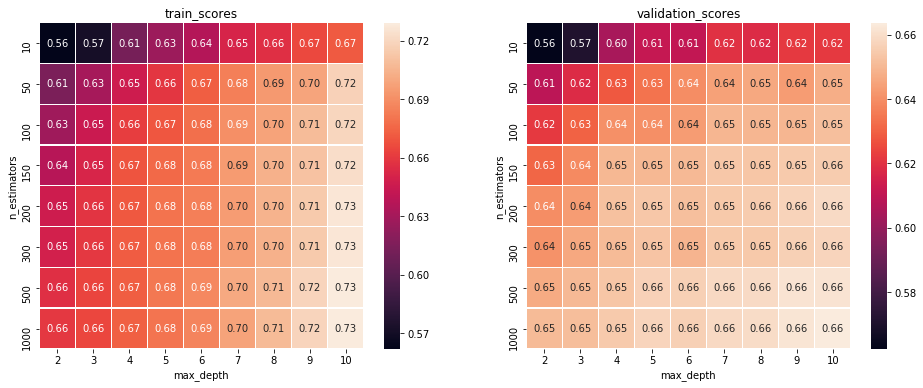

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(train_scores1).reshape(len(parameters["n_estimators"]) , len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")

t2=np.array(val_scores1).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")

plt.show()

#### 2.4.1.2 b) 3-D plot of parameters v/s scores

In [0]:
# print(train_scores1)
# print(val_scores1)
# [0.5619741720201549, 0.5715154084050276, 0.6123763854459024, 0.6272070878749169, 0.6361324010585658, 0.651140906274795, 0.6567383298438919, 0.6656525835066959, 0.6712455999323621, 0.6147706815915404, 0.630952032192616, 0.6464514837677235, 0.6591204895896181, 0.6728258235056797, 0.6847419396077344, 0.6944281778948065, 0.698838119943044, 0.7176716407339424, 0.6279950834900536, 0.6452543456576211, 0.6616736566443099, 0.6699432990113227, 0.6785749647534947, 0.6906164154499812, 0.6981264441693225, 0.7087126164352849, 0.7198748691884024, 0.6373019243303615, 0.6520595457064745, 0.6697034429924993, 0.6765395564444714, 0.6826967633081851, 0.6949278869155616, 0.7043741260829757, 0.7113528250255826, 0.7231097206178098, 0.646479269783611, 0.6583734416443626, 0.670987714114058, 0.6802041315294114, 0.6845696606938824, 0.6956364670016041, 0.7048293307441139, 0.714261537878406, 0.7272994141786934, 0.6493730285992, 0.6599469729894005, 0.6717817263041661, 0.679927786609122, 0.6839830333129233, 0.696318664003361, 0.7043137139824595, 0.7145573988543148, 0.7270186820404061, 0.6562153533519628, 0.664047431405679, 0.6730634859155041, 0.6821847032362661, 0.6878189852330353, 0.7005679192110653, 0.7075653752314464, 0.7188805140181985, 0.7289933087227068, 0.6595004395142886, 0.6646101156621554, 0.6733620015024682, 0.6804424297416791, 0.6868043151785017, 0.6984988713374507, 0.708333199063088, 0.7189198323311067, 0.7292882676199356]
# [0.5624006463406371, 0.5709684118910286, 0.604689485387224, 0.6114762136608406, 0.6108327889760506, 0.6199485873107436, 0.6183771921739228, 0.6219483862094591, 0.6220039995651987, 0.6091377388792888, 0.6183828072973263, 0.6283859336741623, 0.6336338491961059, 0.6396351203166102, 0.6444502638529374, 0.646023337822009, 0.6432178298374421, 0.64750303285936, 0.6220564019505163, 0.6304590551639666, 0.6406008563446225, 0.6403379968522384, 0.6431519967941149, 0.6495869037653746, 0.6498047526241493, 0.6495953957226843, 0.6518623245414519, 0.6310258484911919, 0.6388210659675292, 0.6500475557759009, 0.6501635337456447, 0.6505667468741, 0.6540048323311927, 0.6536889021804592, 0.6549156721745241, 0.6550145195355686, 0.6396498060239728, 0.6434153371170953, 0.652457910656753, 0.6540095835894572, 0.6521783524882389, 0.654484244884643, 0.6551228694131417, 0.6573041940864389, 0.659350682451015, 0.6408911150313202, 0.6460927730199726, 0.6508047498695604, 0.653197110276574, 0.6491442951267133, 0.6545749833229205, 0.65442555910289, 0.6565636497708826, 0.6577471857596429, 0.6468855730267662, 0.6506100297774313, 0.6536868403136652, 0.6567384113184327, 0.6562658118900409, 0.6588413769038874, 0.6592813939471318, 0.6616356546416476, 0.6615401649451057, 0.6507251927800629, 0.6516116569570669, 0.6547706650762422, 0.6575521315309977, 0.6565294863495372, 0.6587279416315338, 0.6594474679452652, 0.6618676594791619, 0.6637035440425911]


#### 2.4.1.3 Running RF with best params on features(set1)

In [0]:
best_n_estimators = 200
best_max_depth = 8

In [0]:
%%time 
rf_model1 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, class_weight="balanced", random_state=28)
rf_model1.fit(X_train_set1, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_model1.predict_proba(X_train_set1)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_model1.predict_proba(X_val_set1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rf_model1.predict_proba(X_test_set1)[:,1])

CPU times: user 14.9 s, sys: 120 ms, total: 15.1 s
Wall time: 15.1 s


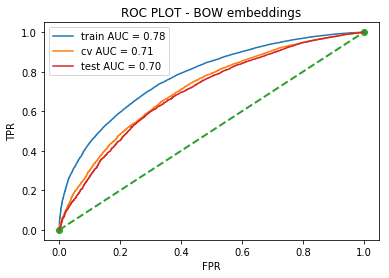

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

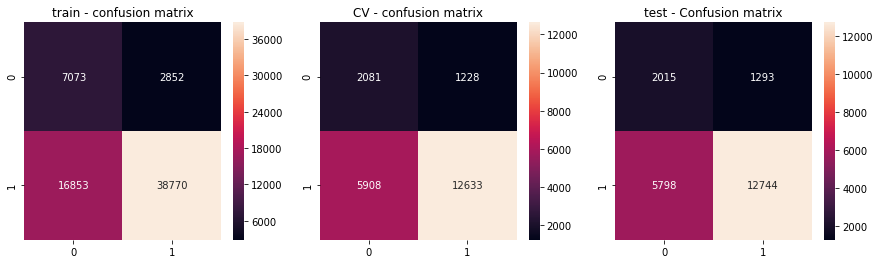

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, rf_model1.predict(X_train_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')

#cv data
data = confusion_matrix(y_val, rf_model1.predict(X_val_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')

#test data
data = confusion_matrix(y_test, rf_model1.predict(X_test_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')

plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation
print("x_train {0} | y_train {1} ".format(X_train_set2.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set2.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set2.shape, y_test.shape))

x_train (65548, 17112) | y_train (65548,) 
x_val (21850, 17112) | y_train (21850,) 
x_test  (21850, 17112) | y_test  (21850,) 


#### 2.4.2.1 Finding optimal hyperparameters on SET2

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
train_scores2=[]
val_scores2=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        rf_model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, class_weight="balanced", random_state=28)
        rf_model.fit(X_train_set2, y_train)
        
        y_train_pred = rf_model.predict(X_train_set2)
        y_val_pred = rf_model.predict(X_val_set2)
        
        train_scores2.append(roc_auc_score(y_train,y_train_pred))
        val_scores2.append(roc_auc_score(y_val,y_val_pred))
       

100%|██████████| 8/8 [27:13<00:00, 341.06s/it]

CPU times: user 27min 6s, sys: 5.61 s, total: 27min 11s
Wall time: 27min 13s


#### 2.4.2.2 a) Heatmaps of parameters v/s scores

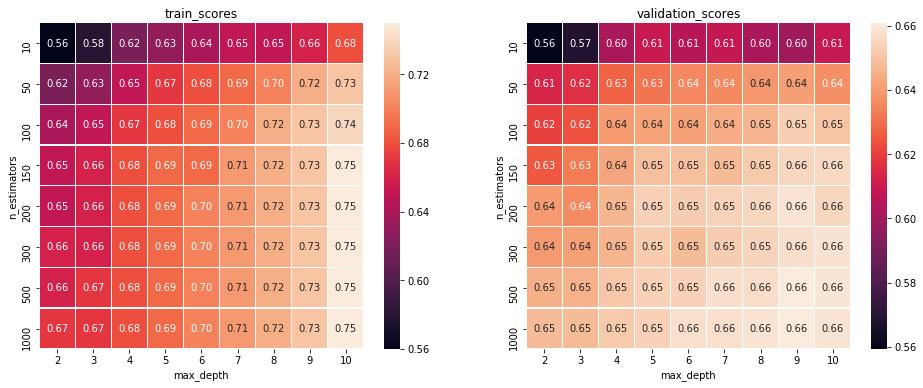

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(train_scores2).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")

t2=np.array(val_scores2).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")

plt.show()

In [0]:
#print(train_scores2)
#print(val_scores2)
#[0.56,0.58,0.62,0.63, 0.64, 0.65,0.65,0.66, 0.68,0.62,0.63,0.65,0.67,0.68,0.69,0.70, 0.72,0.73,0.64,0.65,0.67,0.68,0.69,0.70, 0.72,0.73,0.74,0.65,0.66,0.68,0.69,0.69, 0.71,0.72,0.73,0.75,0.65,0.66,0.68,0.69,0.701, 0.71,0.72,0.73,0.75,0.66,0.66,0.68,0.69,0.701,0.71,0.72,0.73,0.75,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.75,0.67,0.67,0.68,0.69,0.701,0.71,0.72,0.73,0.75]
#[0.5593476735924365, 0.5683440384968297, 0.6018607019419313, 0.6095943079045828, 0.6050808896422227, 0.6087017477735791, 0.6018113230846003, 0.5993123405302916, 0.6089491065914883, 0.6139643490028852, 0.61666616057209, 0.6273627587640789, 0.6312853910674291, 0.6357080219934849, 0.6360354187314877, 0.6393408275427068, 0.6409614059447516, 0.637367417279086, 0.6206757906146725, 0.6236965069645704, 0.6399051270705687, 0.6422281500756721, 0.6417486886241952, 0.6442429199202395, 0.6463108093211831, 0.6530748896587503, 0.6502419824798695, 0.6254143027934351, 0.6329257405716169, 0.6428342900150767, 0.6493068647662644, 0.6492113750697225, 0.6479870988750212, 0.6518254228306093, 0.6555678740551129, 0.6558058281525467, 0.6402069501405891, 0.6366095549123943, 0.6467068751880639, 0.6538163956354991, 0.6525677437744704, 0.6543984940450923, 0.6555272316452251, 0.658530434351881, 0.6553362522521412, 0.6397699077273045, 0.6413301215153452, 0.6463015023967612, 0.6524179365198972, 0.6480825885715629, 0.6525792592597663, 0.6548419176508657, 0.6575685857169941, 0.658217478831107, 0.6451180153060277, 0.6454428693466404, 0.6513379991504457, 0.6539028636461084, 0.6540034387374308, 0.6573987221217883, 0.6572925319070626, 0.6606022111459499, 0.6590431953595642, 0.6484991916096723, 0.6481674266479478, 0.6517857420819141, 0.653940099493467, 0.6577202184978985, 0.657743730299087, 0.6588514987954215, 0.6608765861236299, 0.6587409892550009]

#### 2.4.2.3 Running RF with best params on features(set2)

In [0]:
best_n_estimators = 300
best_max_depth = 9

In [0]:
%%time 
rf_model2 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, class_weight="balanced", random_state=28)
rf_model2.fit(X_train_set2, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_model2.predict_proba(X_train_set2)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_model2.predict_proba(X_val_set2)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rf_model2.predict_proba(X_test_set2)[:,1])

CPU times: user 33.8 s, sys: 133 ms, total: 34 s
Wall time: 34 s


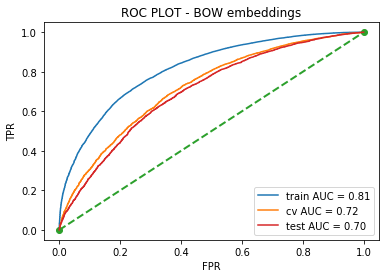

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

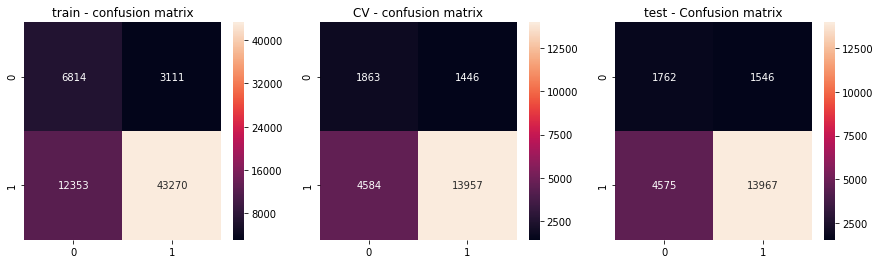

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, rf_model2.predict(X_train_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')

#cv data
data = confusion_matrix(y_val, rf_model2.predict(X_val_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')

#test data
data = confusion_matrix(y_test, rf_model2.predict(X_test_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')

plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation
print("x_train {0} | y_train {1} ".format(X_train_set3.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set3.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set3.shape, y_test.shape))

x_train (65548, 213) | y_train (65548,) 
x_val (21850, 213) | y_train (21850,) 
x_test  (21850, 213) | y_test  (21850,) 


#### 2.4.3.1 Finding optimal hyperparameters on set3

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
train_scores3=[]
val_scores3=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        rf_model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, class_weight="balanced", random_state=28)
        rf_model.fit(X_train_set3, y_train)
        
        y_train_pred = rf_model.predict(X_train_set3)
        y_val_pred = rf_model.predict(X_val_set3)
        
        train_scores3.append(roc_auc_score(y_train,y_train_pred))
        val_scores3.append(roc_auc_score(y_val,y_val_pred))
       

100%|██████████| 8/8 [5:15:32<00:00, 3979.40s/it]

CPU times: user 5h 15min 19s, sys: 5.73 s, total: 5h 15min 25s
Wall time: 5h 15min 32s


#### 2.4.3.2 a) Heatmaps of parameters v/s scores

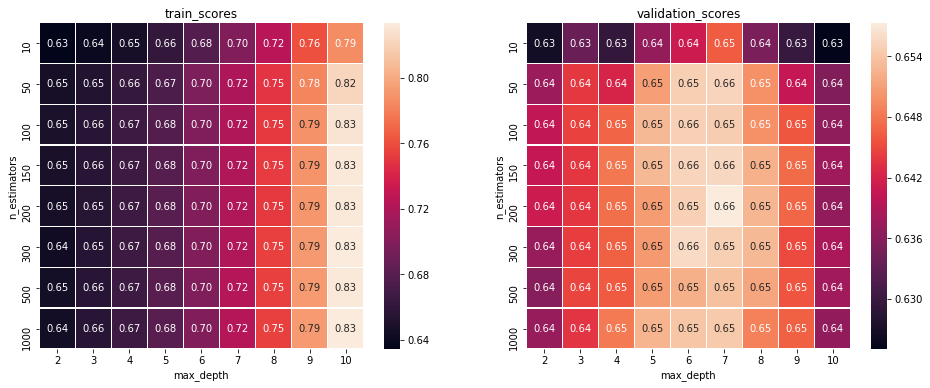

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(train_scores3).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")

t2=np.array(val_scores3).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")

plt.show()

In [0]:
# print(train_scores3)
# print(val_scores3)
# [0.6345668253953807, 0.639993968933805, 0.6469095694652888, 0.6611244320176162, 0.6775731900767179, 0.6998829561969705, 0.7249987521697777, 0.7609908510111546, 0.7868481393563025, 0.6469563389843219, 0.6531232939131291, 0.6622988352090184, 0.674317829037161, 0.6975603381726322, 0.719453633767196, 0.748960706186317, 0.7832501677472365, 0.8224258897305723, 0.6486623183032625, 0.6562037730527633, 0.6661018032924151, 0.6776417924357714, 0.6991008340559699, 0.7213952766127815, 0.7513886618219788, 0.788659404661582, 0.8294900923276625, 0.6478850443823164, 0.6562674040163603, 0.666672769283279, 0.6792714718387295, 0.698818615661544, 0.7215098695875901, 0.752671836139038, 0.7895096165345951, 0.8314506869768413, 0.6465774858641509, 0.654830636312806, 0.6664750093638212, 0.6803164711189231, 0.6997143571482558, 0.7216147661222901, 0.7518892013709966, 0.7906965655029806, 0.8317111757812161, 0.6438374236850268, 0.6546905623323914, 0.6662553251284931, 0.6789811664357354, 0.6995304345361003, 0.7215872146830876, 0.754526632174837, 0.7920610310569115, 0.8336552785120376, 0.6453504396795792, 0.6560625307174319, 0.6663399783292806, 0.6802943520772331, 0.6984331817143761, 0.7225209829523884, 0.7541612468357621, 0.7925395231146566, 0.8320636258916688, 0.6445690964418567, 0.655941921167652, 0.6672048064128737, 0.6807289955032374, 0.6992564263256448, 0.7233391846177832, 0.7536156903000865, 0.7926294139871375, 0.8334932802157525]
# [0.6266432813483741, 0.6338491064594636, 0.6293545465360809, 0.6370496208536653, 0.6412770508569957, 0.646286914485452, 0.6350508732625247, 0.629737792970286, 0.6250329633822727, 0.637645109172913, 0.6438770893332231, 0.6423056941964024, 0.6510041234239005, 0.6548997884655063, 0.655361589579661, 0.6500112734400637, 0.640638947907449, 0.635587382411859, 0.640390203645449, 0.6446274703018242, 0.6468045245474532, 0.6531294028088885, 0.6550123598727211, 0.6546968127565302, 0.6499453426006829, 0.6459681971471947, 0.6366801799623416, 0.64066371475799, 0.6438004579756584, 0.6481528876346654, 0.6531401033270723, 0.6553625023428267, 0.6555653313577227, 0.6524909657228256, 0.6472840267472858, 0.6378834381552183, 0.6413006604542375, 0.6437418210919325, 0.64759727565622, 0.6508144887265517, 0.654936160447726, 0.6573297677544212, 0.6529066070997425, 0.6468897864067366, 0.6368359853748611, 0.6373022117604351, 0.6442922987775705, 0.6465609553266161, 0.6505927524746518, 0.6559018475777114, 0.6548149503891214, 0.6530898117065755, 0.6451681520827731, 0.6385460553155016, 0.6359101827353488, 0.6447237749654784, 0.6461941141803805, 0.6508572907992871, 0.6523079078100726, 0.6537302617614057, 0.6515950479273194, 0.6457725642918997, 0.6379313745207607, 0.63722601233544, 0.6436121190760183, 0.6483626275706733, 0.6526752297869045, 0.6541476797666272, 0.6545504120644862, 0.6487887249756402, 0.6465327819135458, 0.636819286698731]

[0.6345668253953807, 0.639993968933805, 0.6469095694652888, 0.6611244320176162, 0.6775731900767179, 0.6998829561969705, 0.7249987521697777, 0.7609908510111546, 0.7868481393563025, 0.6469563389843219, 0.6531232939131291, 0.6622988352090184, 0.674317829037161, 0.6975603381726322, 0.719453633767196, 0.748960706186317, 0.7832501677472365, 0.8224258897305723, 0.6486623183032625, 0.6562037730527633, 0.6661018032924151, 0.6776417924357714, 0.6991008340559699, 0.7213952766127815, 0.7513886618219788, 0.788659404661582, 0.8294900923276625, 0.6478850443823164, 0.6562674040163603, 0.666672769283279, 0.6792714718387295, 0.698818615661544, 0.7215098695875901, 0.752671836139038, 0.7895096165345951, 0.8314506869768413, 0.6465774858641509, 0.654830636312806, 0.6664750093638212, 0.6803164711189231, 0.6997143571482558, 0.7216147661222901, 0.7518892013709966, 0.7906965655029806, 0.8317111757812161, 0.6438374236850268, 0.6546905623323914, 0.6662553251284931, 0.6789811664357354, 0.6995304345361003, 0.721587

#### 2.4.3.3 Running RF with best params on features(set3)

In [0]:
best_n_estimators = 150
best_max_depth = 6

In [0]:
%%time 
rf_model3 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, class_weight="balanced", random_state=28)
rf_model3.fit(X_train_set3, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_model3.predict_proba(X_train_set3)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_model3.predict_proba(X_val_set3)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rf_model3.predict_proba(X_test_set3)[:,1])

CPU times: user 2min 1s, sys: 60 ms, total: 2min 1s
Wall time: 2min 1s


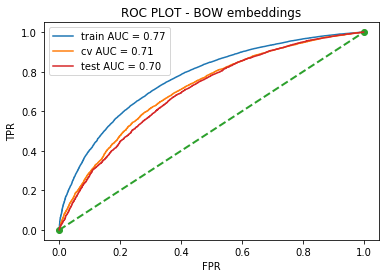

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

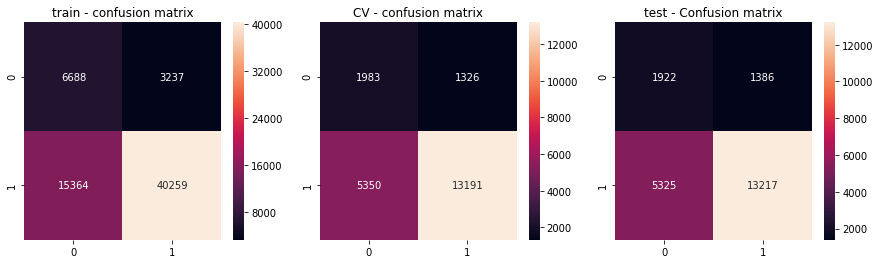

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, rf_model3.predict(X_train_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')

#cv data
data = confusion_matrix(y_val, rf_model3.predict(X_val_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')

#test data
data = confusion_matrix(y_test, rf_model3.predict(X_test_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')

plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation
print("x_train {0} | y_train {1} ".format(X_train_set4.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set4.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set4.shape, y_test.shape))

x_train (65548, 213) | y_train (65548,) 
x_val (21850, 213) | y_train (21850,) 
x_test  (21850, 213) | y_test  (21850,) 


#### 2.4.4.1 Finding optimal hyperparameters on set4

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
train_scores4=[]
val_scores4=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        rf_model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, class_weight="balanced", random_state=28)
        rf_model.fit(X_train_set4, y_train)
        
        y_train_pred = rf_model.predict(X_train_set4)
        y_val_pred = rf_model.predict(X_val_set4)
        
        train_scores4.append(roc_auc_score(y_train,y_train_pred))
        val_scores4.append(roc_auc_score(y_val,y_val_pred))
       

100%|██████████| 8/8 [2:39:22<00:00, 2019.94s/it]

CPU times: user 2h 39min 10s, sys: 5.65 s, total: 2h 39min 16s
Wall time: 2h 39min 22s
CPU times: user 2h 39min 10s, sys: 5.65 s, total: 2h 39min 16s
Wall time: 2h 39min 22s


#### 2.4.4.2 a) Heatmaps of parameters v/s scores

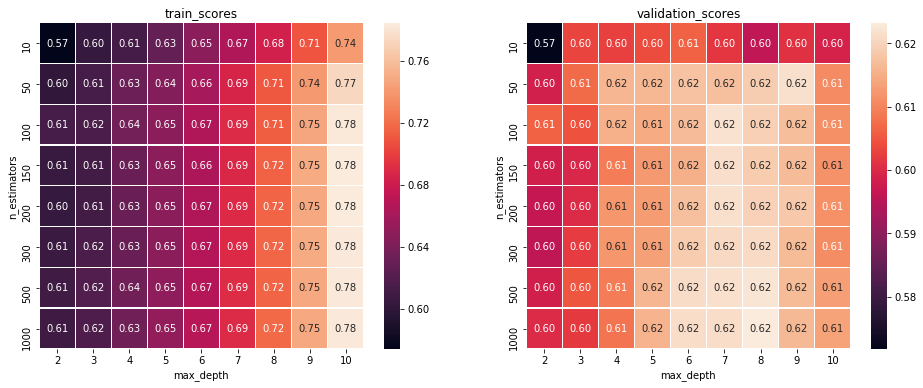

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(train_scores4).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")

t2=np.array(val_scores4).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")

plt.show()

In [0]:
# print(train_scores4)
# print(val_scores4)
# train_scores4 = [0.5742978800562314, 0.6041703341916214, 0.6123613399328177, 0.628917056808903, 0.6475460222020946, 0.6650496190823334, 0.6843041923427378, 0.7096475847590547, 0.741045532738369, 0.6015654379965594, 0.6136362442896088, 0.6319427591226668, 0.644170870366901, 0.6608638001124066, 0.6863233233846554, 0.7108944848259, 0.7402200945181013, 0.7737361051240469, 0.6129466875575772, 0.6156516039905389, 0.6365500716387232, 0.6479424124201381, 0.6654178537582829, 0.6906258773134049, 0.7135179352216031, 0.747456627654028, 0.7826224378214419, 0.6055876293132278, 0.6115494645923023, 0.631235041264439, 0.6486589563393466, 0.6643465945692055, 0.6885313484341848, 0.7154899072928487, 0.7493156877324227, 0.7841921661259402, 0.603893273767158, 0.6116864945100225, 0.6314872483344263, 0.6488486292502362, 0.66588095070217, 0.6896280170784507, 0.7158479845266336, 0.7487943206720342, 0.7845530211461825, 0.6063850034672518, 0.6154339186383901, 0.6316401859930456, 0.6482498455439328, 0.667176352894991, 0.6900881415100607, 0.7168337400612281, 0.7494921075134686, 0.7834499464753064, 0.609935641305259, 0.6192014629252682, 0.6350462195318057, 0.6500900253691514, 0.6685938508937302, 0.6914009376999195, 0.7163127624524783, 0.7480727338069519, 0.7831819548398219, 0.6091810706034612, 0.617345303808733, 0.634978960328056, 0.6517631639522112, 0.6688300270474163, 0.6907400092861574, 0.7181117482570114, 0.7489016055415526, 0.7833640017442]
# val_scores4 = [0.5717192655405549, 0.6033115145448239, 0.6028115159221185, 0.6040899629807709, 0.6062049248821179, 0.601536133139808, 0.5961866808653498, 0.6010082544921924, 0.599006581169119, 0.5985933928432099, 0.6072948455986944, 0.6161658767108951, 0.6162479764977828, 0.617773497135855, 0.6173025765397145, 0.6191692668599866, 0.6218445431000166, 0.6108460240419537, 0.6063475848751165, 0.6046049325493285, 0.615442846038581, 0.6147322436147287, 0.6169482125399675, 0.6220360033236967, 0.619631116872168, 0.6172309327808768, 0.611220110245817, 0.5983420977341485, 0.5996617658293385, 0.6093229564548892, 0.6124121952395847, 0.6152428449595645, 0.6215338939361704, 0.6189128374581183, 0.6169278628111746, 0.6117217877007739, 0.5968790035768743, 0.6001677137119635, 0.6121870524251555, 0.6129883443892586, 0.6172927887846964, 0.6218622034373389, 0.6198031890282478, 0.6184765611139192, 0.6114996195163043, 0.5959244488976421, 0.602148752067755, 0.6120346535751653, 0.6132460206908088, 0.6190079930181441, 0.6208263150403045, 0.6209298158635598, 0.6167818940517001, 0.6110458784268898, 0.5984666654572556, 0.6049568027497121, 0.6093212287246111, 0.6161323815625817, 0.6212527058334318, 0.6217701692013529, 0.6223496760155294, 0.6167604930153325, 0.6130324830080579, 0.6001716011050889, 0.6020956814094055, 0.6082091409025816, 0.6158092063542203, 0.6212856712531222, 0.6214033280551173, 0.6232776953655867, 0.6164689874289531, 0.6137070964842335]

[0.5742978800562314, 0.6041703341916214, 0.6123613399328177, 0.628917056808903, 0.6475460222020946, 0.6650496190823334, 0.6843041923427378, 0.7096475847590547, 0.741045532738369, 0.6015654379965594, 0.6136362442896088, 0.6319427591226668, 0.644170870366901, 0.6608638001124066, 0.6863233233846554, 0.7108944848259, 0.7402200945181013, 0.7737361051240469, 0.6129466875575772, 0.6156516039905389, 0.6365500716387232, 0.6479424124201381, 0.6654178537582829, 0.6906258773134049, 0.7135179352216031, 0.747456627654028, 0.7826224378214419, 0.6055876293132278, 0.6115494645923023, 0.631235041264439, 0.6486589563393466, 0.6643465945692055, 0.6885313484341848, 0.7154899072928487, 0.7493156877324227, 0.7841921661259402, 0.603893273767158, 0.6116864945100225, 0.6314872483344263, 0.6488486292502362, 0.66588095070217, 0.6896280170784507, 0.7158479845266336, 0.7487943206720342, 0.7845530211461825, 0.6063850034672518, 0.6154339186383901, 0.6316401859930456, 0.6482498455439328, 0.667176352894991, 0.690088141

#### 2.4.4.3 Running RF with best params on features(set4)

In [0]:
best_n_estimators = 150
best_max_depth = 6 

In [0]:
%%time 
rf_model4 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, class_weight="balanced", random_state=28)
rf_model4.fit(X_train_set4, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_model4.predict_proba(X_train_set4)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_model4.predict_proba(X_val_set4)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rf_model4.predict_proba(X_test_set4)[:,1])

CPU times: user 1min 3s, sys: 107 ms, total: 1min 4s
Wall time: 1min 4s


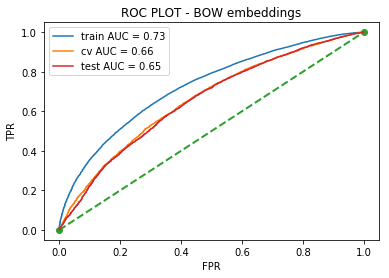

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLsOT - BOW embeddings")
plt.show()

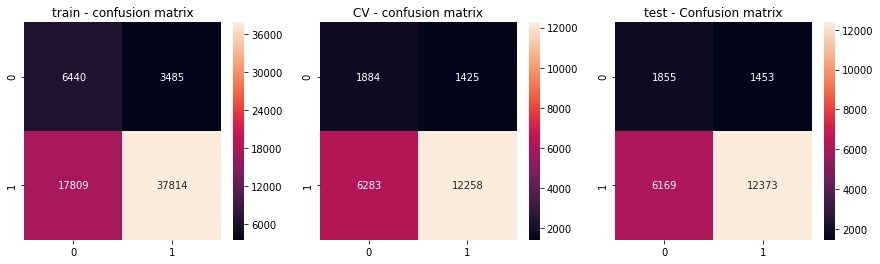

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, rf_model4.predict(X_train_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')

#cv data
data = confusion_matrix(y_val, rf_model4.predict(X_val_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')

#test data
data = confusion_matrix(y_test, rf_model4.predict(X_test_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')

plt.show()

## <b>2.5 Applying GBDT</b>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
print("ok continue")

ok continue


In [0]:
## since data is very large, i'm considering, 30k train points , 10k validation points and 10k test points
y_train = y_train[:30000]
y_val=y_val[:10000]
y_test = y_test[:10000]

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation
X_train_set1 = X_train_set1.tocsr()[:30000]
X_val_set1 = X_val_set1.tocsr()[:10000]
X_test_set1 = X_test_set1.tocsr()[:10000]

print("x_train {0} | y_train {1} ".format(X_train_set1.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set1.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set1.shape, y_test.shape))


x_train (30000, 17112) | y_train (30000,) 
x_val (10000, 17112) | y_train (10000,) 
x_test  (10000, 17112) | y_test  (10000,) 


#### 2.5.1.1 Finding optimal hyperparameters on set1

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
xgb_train_scores1=[]
xgb_val_scores1=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        xgb_model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth)
        xgb_model.fit(X_train_set1 , y_train)
        
        y_train_pred = xgb_model.predict(X_train_set1)
        y_val_pred = xgb_model.predict(X_val_set1)
        
        xgb_train_scores1.append(roc_auc_score(y_train,y_train_pred))
        xgb_val_scores1.append(roc_auc_score(y_val,y_val_pred))
    print( xgb_train_scores1,"|", xgb_val_scores1)

 12%|█▎        | 1/8 [00:47<05:29, 47.00s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991] | [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988]


 25%|██▌       | 2/8 [03:17<07:48, 78.07s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482] | [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5023046583978459, 0.5043359490339246, 0.5078138596281964, 0.5048199155649502]


 38%|███▊      | 3/8 [07:50<11:22, 136.57s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552] | [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5023046583978459, 0.5043359490339246, 0.5078138596281964, 0.5048199155649502, 0.5, 0.5, 0.5005258125260316, 0.502342593552197, 0.5075195688689261, 0.5094710783556479, 0.517129286525785, 0.5160319046380615, 0.5220708292350982]


 50%|█████     | 4/8 [14:23<14:14, 213.55s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271] | [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5023046583978459, 0.5043359490339246, 0.5078138596281964, 0.5048199155649502, 0.5, 0.5, 0.5005258125260316, 0.502342593552197, 0.5075195688689261, 0.5094710783556479, 0.517129286525785, 0.5160319046380615, 0.5220708292350982, 0.5, 0.5011523291989229, 0.502498245010

 62%|██████▎   | 5/8 [22:59<15:12, 304.20s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439] | [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5023046583978459, 0.5043359490339246, 0.5078138596281964, 0.5048199155649502, 0.5, 0.5

 75%|███████▌  | 6/8 [35:37<14:40, 440.32s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439, 0.5045936735289722, 0.5186036064737922, 0.5404352845268865, 0.5778321926081693, 0.6177644798578428, 0.6801493555005128, 0.7464287341438929, 0.8092579554875182, 0.8781250610182456] | [0.5, 0.5, 0.5, 0.5, 0.5

 88%|████████▊ | 7/8 [56:16<11:19, 679.94s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439, 0.5045936735289722, 0.5186036064737922, 0.5404352845268865, 0.5778321926081693, 0.6177644798578428, 0.6801493555005128, 0.7464287341438929, 0.8092579554875182, 0.8781250610182456, 0.51324528420285, 0.540389

100%|██████████| 8/8 [1:37:08<00:00, 1211.47s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439, 0.5045936735289722, 0.5186036064737922, 0.5404352845268865, 0.5778321926081693, 0.6177644798578428, 0.6801493555005128, 0.7464287341438929, 0.8092579554875182, 0.8781250610182456, 0.51324528420285, 0.540389

#### 2.5.1.2 a) Heatmaps of parameters v/s scores

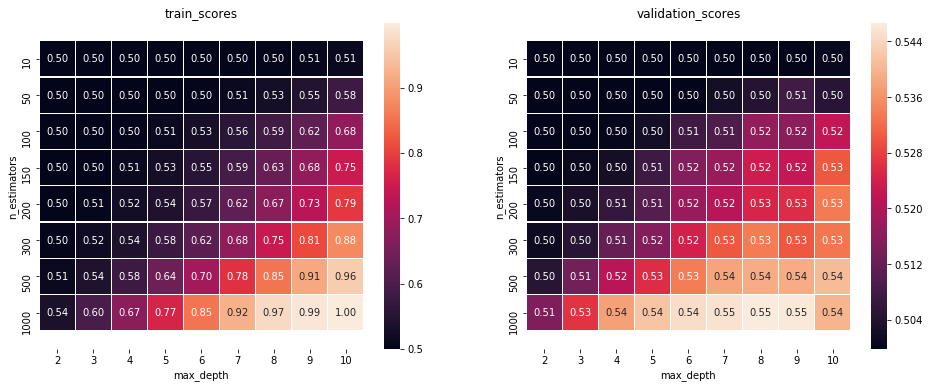

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(xgb_train_scores1).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.2, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")
axs[0].set_ylim(len(parameters["n_estimators"])+0.5,-0.5)

t2=np.array(xgb_val_scores1).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.2, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")
axs[1].set_ylim(len(parameters["n_estimators"])+0.5,- 0.5)

plt.show()

In [0]:
print(xgb_train_scores1)
print(xgb_val_scores1)
# xgb_train_scores1 = [0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439, 0.5045936735289722, 0.5186036064737922, 0.5404352845268865, 0.5778321926081693, 0.6177644798578428, 0.6801493555005128, 0.7464287341438929, 0.8092579554875182, 0.8781250610182456, 0.51324528420285, 0.5403895020553058, 0.5797990091556142, 0.6395178105925522, 0.7015106011231984, 0.7837603382715176, 0.8531436587042343, 0.9123723319686361, 0.9564475560590006, 0.5365994331024337, 0.5958150630021091, 0.6746145557206485, 0.7671300264625214, 0.8547184772696803, 0.9247290990296251, 0.9740188198588391, 0.9927597737473732, 0.9992223950233282]
# xgb_val_scores1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4998234255444379, 0.4998234255444379, 0.5007991802877988, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5023046583978459, 0.5043359490339246, 0.5078138596281964, 0.5048199155649502, 0.5, 0.5, 0.5005258125260316, 0.502342593552197, 0.5075195688689261, 0.5094710783556479, 0.517129286525785, 0.5160319046380615, 0.5220708292350982, 0.5, 0.5011523291989229, 0.5024982450102562, 0.5074018525652181, 0.5153334284971226, 0.5176171638974656, 0.5236142424994964, 0.5223991443080647, 0.5302966959262728, 0.5008789614371557, 0.5029691102250884, 0.5061697422169382, 0.5102702586434467, 0.5178905316592328, 0.5212298029522936, 0.5250190164626838, 0.5259359130541906, 0.5335182509156255, 0.5014636321150413, 0.5048617615599561, 0.5122636141251743, 0.5154053879651701, 0.524278694326739, 0.5303307202399692, 0.533867488986095, 0.5303477323968173, 0.5331611911638466, 0.504685187104394, 0.5136893110858645, 0.5213645314128499, 0.5259320022135359, 0.5340610755985052, 0.5381995271793649, 0.5390784886165205, 0.5391543589252228, 0.54065983703527, 0.5149972917428466, 0.5267141703444864, 0.5375939335039763, 0.541908959540398, 0.5448950819223346, 0.5454418174458691, 0.5466948507916519, 0.5462998558855219, 0.5400882676735778]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5005554321261942, 0.5008886914019106, 0.5039991113085981, 0.5058875805376584, 0.5134414574538991, 0.5, 0.5, 0.5, 0.5009997778271496, 0.5045545434347922, 0.5120103772905209, 0.5271181311230025, 0.5453493482268983, 0.5792699251489482, 0.5, 0.5005554321261942, 0.5040513718975297, 0.5123370713188617, 0.5300651168854947, 0.5552229095784031, 0.5855429384212295, 0.6238154945396964, 0.6826978651636552, 0.5005554321261942, 0.5022935977058106, 0.5128336776087485, 0.5275819983060355, 0.5537722208029225, 0.5899079609823733, 0.632467105213574, 0.6820966505658803, 0.7481081610172271, 0.5010716470281835, 0.5070049229073975, 0.523805059847915, 0.5422584498022885, 0.5730032157339677, 0.6243643614185148, 0.6733208229720122, 0.7286418627409526, 0.7913992148835439, 0.5045936735289722, 0.5186036064737922, 0.5404352845268865, 0.5778321926081693, 0.6177644798578428, 0.6801493555005128, 0.7464287341438929, 0.8092579554875182, 0.8781250610182456, 0.51324528420285, 0.540389

#### 2.5.1.3 Running XGBoost with best params on features(set1)

In [0]:
best_n_estimators = 300
best_max_depth = 6

In [0]:
%%time 
xgb_model1 = xgb.XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=28)
xgb_model1.fit(X_train_set1, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, xgb_model1.predict_proba(X_train_set1)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, xgb_model1.predict_proba(X_val_set1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb_model1.predict_proba(X_test_set1)[:,1])

CPU times: user 1min 23s, sys: 123 ms, total: 1min 23s
Wall time: 1min 23s


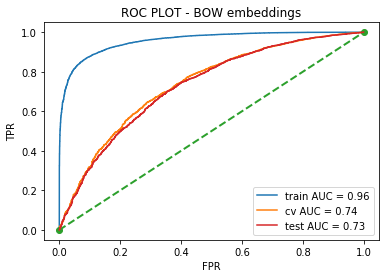

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

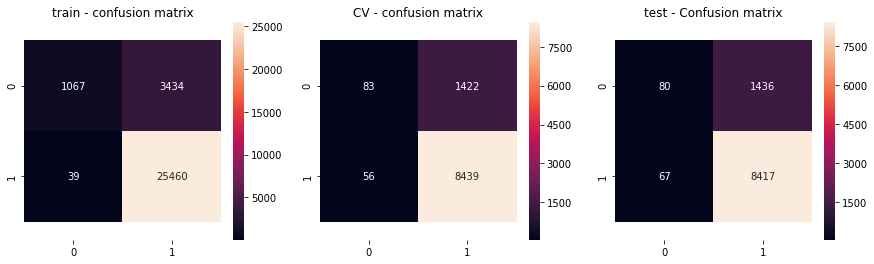

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, xgb_model1.predict(X_train_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')
axs[0].set_title("train - confusion matrix")
axs[0].set_ylim(len(df_cm)+0.2, -0.2)

#cv data
data = confusion_matrix(y_val, xgb_model1.predict(X_val_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')
axs[1].set_title("CV - confusion matrix")
axs[1].set_ylim(len(df_cm)+0.2, -0.2)

#test data
data = confusion_matrix(y_test, xgb_model1.predict(X_test_set1))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')
axs[2].set_title("test - Confusion matrix")
axs[2].set_ylim(len(df_cm)+0.2, -0.2)

plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation
X_train_set2 = X_train_set2.tocsr()[:30000]
X_val_set2 = X_val_set2.tocsr()[:10000]
X_test_set2 = X_test_set2.tocsr()[:10000]

print("x_train {0} | y_train {1} ".format(X_train_set2.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set2.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set2.shape, y_test.shape))


x_train (30000, 17112) | y_train (30000,) 
x_val (10000, 17112) | y_train (10000,) 
x_test  (10000, 17112) | y_test  (10000,) 


#### 2.5.2.1 Finding optimal hyperparameters on set2

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
xgb_train_scores2=[]
xgb_val_scores2=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        xgb_model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth)
        xgb_model.fit(X_train_set2 , y_train)
        
        y_train_pred = xgb_model.predict(X_train_set2)
        y_val_pred = xgb_model.predict(X_val_set2)
        
        xgb_train_scores2.append(roc_auc_score(y_train,y_train_pred))
        xgb_val_scores2.append(roc_auc_score(y_val,y_val_pred))
    print( xgb_train_scores2,"|", xgb_val_scores2)

 12%|█▎        | 1/8 [01:23<09:41, 83.08s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522] | [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059]


 25%|██▌       | 2/8 [07:00<15:57, 159.50s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522] | [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059, 0.5, 0.5, 0.5011902643532741, 0.5033183482955579, 0.5077720136331906, 0.5104677560965117, 0.5157206017219431, 0.5174405894419035, 0.516814072769012]


 38%|███▊      | 3/8 [17:43<25:21, 304.35s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273] | [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059, 0.5, 0.5, 0.5011902643532741, 0.5033183482955579, 0.5077720136331906, 0.5104677560965117, 0.5157206017219431, 0.5174405894419035, 0.516814072769012, 0.499941141848146, 0.5032804131412068, 0.508259891004871, 0.5151359310440576, 0.519375086771777, 0.5228909325203999, 0.5261124875097527, 0.5255827641430664, 0.5278704103840641]


 50%|█████     | 4/8 [33:30<33:09, 497.31s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355] | [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059, 0.5, 0.5, 0.5011902643532741, 0.5033183482955579, 0.5077720136331906, 0.5104677560965117, 0.5157206017219431, 0.5174405894419035, 0.516814072769012, 0.499941141848146, 0.5032804131412068, 0.508259891004871, 0.5151359310

 62%|██████▎   | 5/8 [54:04<35:54, 718.18s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141] | [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059, 0.5, 0.5, 0.5011902643532741, 0.50331834

 75%|███████▌  | 6/8 [1:24:27<34:59, 1049.63s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141, 0.5154800560723533, 0.5377756884385052, 0.5696051447630948, 0.6150264493210519, 0.6690341477292534, 0.7366139114986705, 0.7951826314590152, 0.8643307356765275, 0.9

 88%|████████▊ | 7/8 [2:14:49<27:21, 1641.40s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141, 0.5154800560723533, 0.5377756884385052, 0.5696051447630948, 0.6150264493210519, 0.6690341477292534, 0.7366139114986705, 0.7951826314590152, 0.8643307356765275, 0.9

100%|██████████| 8/8 [3:53:20<00:00, 2922.35s/it]

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141, 0.5154800560723533, 0.5377756884385052, 0.5696051447630948, 0.6150264493210519, 0.6690341477292534, 0.7366139114986705, 0.7951826314590152, 0.8643307356765275, 0.9

#### 2.5.2.2 a) Heatmaps of parameters v/s scores

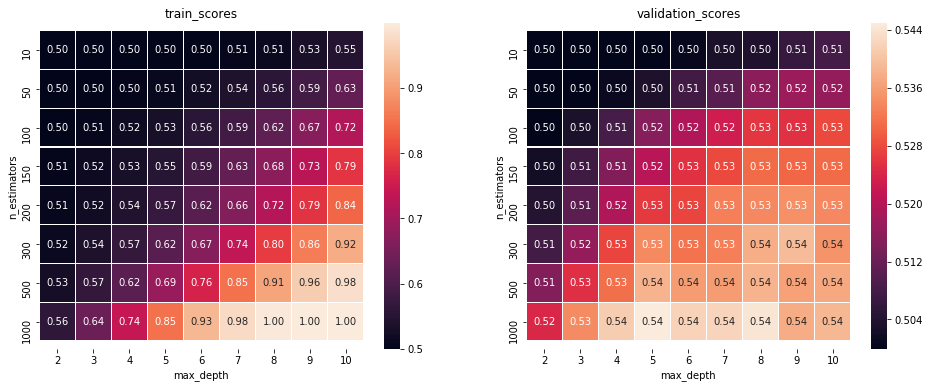

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(xgb_train_scores2).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")
axs[0].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)

t2=np.array(xgb_val_scores2).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")
axs[1].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)
plt.show()

In [0]:
# xgb_train_scores2 = [0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141, 0.5154800560723533, 0.5377756884385052, 0.5696051447630948, 0.6150264493210519, 0.6690341477292534, 0.7366139114986705, 0.7951826314590152, 0.8643307356765275, 0.918658562865694, 0.5292220336951149, 0.5666319851411243, 0.6184309112792509, 0.690081742688325, 0.7646338645183354, 0.8495366325076599, 0.9091573908840855, 0.960675405465452, 0.9835396004525498, 0.5621493109073661, 0.6382696860554469, 0.740495371134654, 0.8503730633206391, 0.9326228004689583, 0.9765607642746057, 0.9974254036074043, 0.9993334814485669, 0.9998889135747612]
# xgb_val_scores2 = [0.5, 0.5, 0.5, 0.5, 0.5006644518272425, 0.5032424779868557, 0.5036505742091791, 0.5066196844342675, 0.5080623935518059, 0.5, 0.5, 0.5011902643532741, 0.5033183482955579, 0.5077720136331906, 0.5104677560965117, 0.5157206017219431, 0.5174405894419035, 0.516814072769012, 0.499941141848146, 0.5032804131412068, 0.508259891004871, 0.5151359310440576, 0.519375086771777, 0.5228909325203999, 0.5261124875097527, 0.5255827641430664, 0.5278704103840641, 0.5020692257904298, 0.5073429944133642, 0.5146859888267282, 0.5205064929731971, 0.5255278168318671, 0.527832475229713, 0.5308983787610065, 0.5304275135461742, 0.5310121842240598, 0.5042770908820705, 0.510799982010133, 0.5195895963816902, 0.5264067782690228, 0.5274204681667347, 0.5329505923945882, 0.5337079266873811, 0.5345868881245368, 0.5338256429910891, 0.5079485880887527, 0.5167761376146609, 0.5274623141617406, 0.533947270135452, 0.5317354942031564, 0.5328289652502254, 0.5377705079595384, 0.5394316375276447, 0.5350159073443632, 0.5148246281279393, 0.5253891775306561, 0.531285551985827, 0.5383381664805759, 0.535815087632162, 0.535853022786513, 0.5384480611029745, 0.5363409001581935, 0.537085133134793, 0.5244892930959975, 0.5340990107528564, 0.5413242888625124, 0.5449539400741887, 0.5420436880009543, 0.5422163516158617, 0.5441508489457351, 0.5375861118226668, 0.5389189263178067]
print(xgb_train_scores2)
print(xgb_val_scores2)

[0.5, 0.5, 0.5, 0.5001110864252388, 0.5012219506776272, 0.5074035732667972, 0.5140491501690249, 0.5336264477405133, 0.5479892485731522, 0.5, 0.5003332592757165, 0.5045153262105874, 0.5108602958139277, 0.5239684068620853, 0.5400367212975118, 0.558352938097193, 0.5896270494256132, 0.6282785601613522, 0.5017381655796166, 0.5076910500709331, 0.5190217783152693, 0.5330055374006111, 0.5557259068556161, 0.5868562797819683, 0.6221556762784648, 0.6704652278926316, 0.7192060818430273, 0.505024975865201, 0.5175057855861305, 0.5320580201623931, 0.5526547041731336, 0.5876469281233667, 0.6287358620970094, 0.6750328146921506, 0.7300402909275017, 0.787674537014355, 0.5084424811881266, 0.5233998442411397, 0.5445061779064936, 0.5738526027816487, 0.6152747960310078, 0.664878167523836, 0.7219374600024174, 0.7862173701215235, 0.8391337257594141, 0.5154800560723533, 0.5377756884385052, 0.5696051447630948, 0.6150264493210519, 0.6690341477292534, 0.7366139114986705, 0.7951826314590152, 0.8643307356765275, 0.9

#### 2.5.2.3 Running XGBoost with best params on features(set2)

In [0]:
best_n_estimators = 200
best_max_depth = 6

In [0]:
%%time 
xgb_model2 = xgb.XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=28)
xgb_model2.fit(X_train_set2, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, xgb_model2.predict_proba(X_train_set2)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, xgb_model2.predict_proba(X_val_set2)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb_model2.predict_proba(X_test_set2)[:,1])

CPU times: user 2min 18s, sys: 138 ms, total: 2min 18s
Wall time: 2min 18s


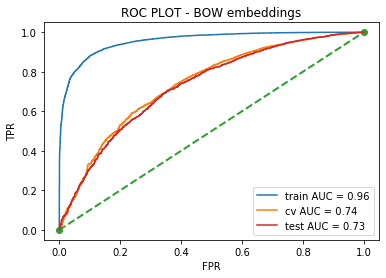

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

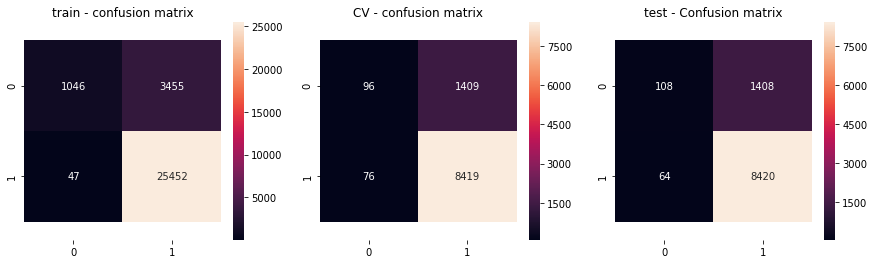

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, xgb_model2.predict(X_train_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')
axs[0].set_title("train - confusion matrix")
axs[0].set_ylim(len(df_cm)+0.2, -0.2)

#cv data
data = confusion_matrix(y_val, xgb_model2.predict(X_val_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')
axs[1].set_title("CV - confusion matrix")
axs[1].set_ylim(len(df_cm)+0.2, -0.2)

#test data
data = confusion_matrix(y_test, xgb_model2.predict(X_test_set2))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')
axs[2].set_title("test - Confusion matrix")
axs[2].set_ylim(len(df_cm)+0.2, -0.2)

plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation
X_train_set3 = X_train_set3.tocsr()[:30000]
X_val_set3 = X_val_set3.tocsr()[:10000]
X_test_set3 = X_test_set3.tocsr()[:10000]

print("x_train {0} | y_train {1} ".format(X_train_set3.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set3.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set3.shape, y_test.shape))

x_train (30000, 213) | y_train (30000,) 
x_val (10000, 213) | y_train (10000,) 
x_test  (10000, 213) | y_test  (10000,) 


#### 2.5.3.1 Finding optimal hyperparameters on set3

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
xgb_train_scores3=[]
xgb_val_scores3=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        xgb_model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth)
        xgb_model.fit(X_train_set3 , y_train)
        
        y_train_pred = xgb_model.predict(X_train_set3)
        y_val_pred = xgb_model.predict(X_val_set3)
        
        xgb_train_scores3.append(roc_auc_score(y_train,y_train_pred))
        xgb_val_scores3.append(roc_auc_score(y_val,y_val_pred))
    print( xgb_train_scores3,"|", xgb_val_scores3)

 12%|█▎        | 1/8 [02:32<17:44, 152.13s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811] | [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827]


 25%|██▌       | 2/8 [12:45<29:03, 290.51s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127] | [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827, 0.5, 0.5005467355235345, 0.5020103676385758, 0.5101185180260422, 0.5102323234890955, 0.5131805107166811, 0.5147239239810794, 0.5170874405307794, 0.5161875560961207]


 38%|███▊      | 3/8 [32:59<47:17, 567.43s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028] | [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827, 0.5, 0.5005467355235345, 0.5020103676385758, 0.5101185180260422, 0.5102323234890955, 0.5131805107166811, 0.5147239239810794, 0.5170874405307794, 0.5161875560961207, 0.501270045502631, 0.5065817492799165, 0.5134538784784484, 0.521541105868412, 0.5249601583108296, 0.5226136539179779, 0.5219492020907354, 0.5242957064835873, 0.5189042215569447]


 50%|█████     | 4/8 [1:03:05<1:02:36, 939.14s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0] | [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827, 0.5, 0.5005467355235345, 0.5020103676385758, 0.5101185180260422, 0.5102323234890955, 0.5131805107166811, 0.5147239239810794, 0.5170874405307794, 0.5161875560961207, 0.501270045502631, 0.5065817492799165, 0.5134538784784484, 0.521541

 62%|██████▎   | 5/8 [1:42:50<1:08:38, 1372.95s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0] | [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827, 0.5, 0.5005467355235345, 0.5020103676385758, 0.5101185180260422, 0.

 75%|███████▌  | 6/8 [2:42:18<1:07:42, 2031.28s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0, 0.5262291783310172, 0.5644886039547324, 0.6283829942091904, 0.7396917665585536, 0.8802096163683301, 0.9811153077093979, 0.9992223950233282, 1.0, 1.0] | [0.5, 0.5, 0.5, 0.5, 0.500878961437155

 88%|████████▊ | 7/8 [4:20:17<53:05, 3185.59s/it]  

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0, 0.5262291783310172, 0.5644886039547324, 0.6283829942091904, 0.7396917665585536, 0.8802096163683301, 0.9811153077093979, 0.9992223950233282, 1.0, 1.0, 0.5427679251968522, 0.6025651610821998, 

100%|██████████| 8/8 [7:28:12<00:00, 5612.45s/it]

[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0, 0.5262291783310172, 0.5644886039547324, 0.6283829942091904, 0.7396917665585536, 0.8802096163683301, 0.9811153077093979, 0.9992223950233282, 1.0, 1.0, 0.5427679251968522, 0.6025651610821998, 

#### 2.5.3.2 a) Heatmaps of parameters v/s scores

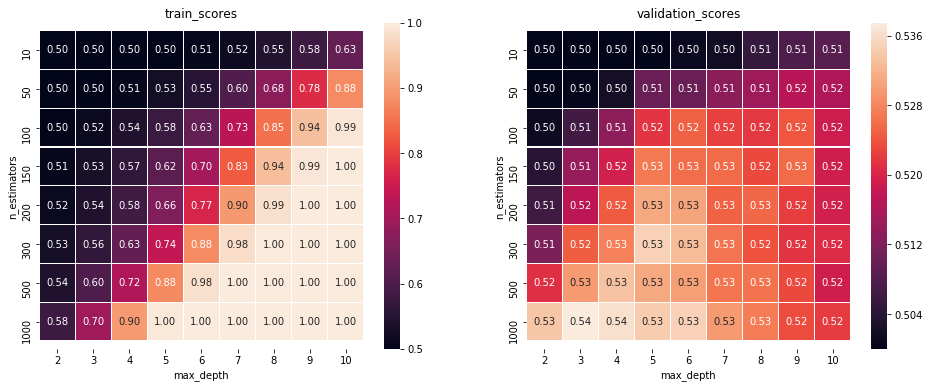

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(xgb_train_scores3).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")
axs[0].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)

t2=np.array(xgb_val_scores3).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")
axs[1].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)
plt.show()

In [0]:
print(xgb_train_scores3)
print(xgb_val_scores3)
# xgb_train_scores3 = [0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0, 0.5262291783310172, 0.5644886039547324, 0.6283829942091904, 0.7396917665585536, 0.8802096163683301, 0.9811153077093979, 0.9992223950233282, 1.0, 1.0, 0.5427679251968522, 0.6025651610821998, 0.7168470930535334, 0.8777853236251781, 0.9846700733170406, 0.9998889135747612, 1.0, 1.0, 1.0, 0.5787860137036883, 0.6987530491043299, 0.8973365344672133, 0.9960008886914019, 1.0, 1.0, 1.0, 1.0, 1.0]
# xgb_val_scores3 = [0.5, 0.5, 0.5, 0.5, 0.5008789614371557, 0.5018926513348676, 0.5052907807797825, 0.5076883216431788, 0.5085842952371827, 0.5, 0.5005467355235345, 0.5020103676385758, 0.5101185180260422, 0.5102323234890955, 0.5131805107166811, 0.5147239239810794, 0.5170874405307794, 0.5161875560961207, 0.501270045502631, 0.5065817492799165, 0.5134538784784484, 0.521541105868412, 0.5249601583108296, 0.5226136539179779, 0.5219492020907354, 0.5242957064835873, 0.5189042215569447, 0.5040037231203033, 0.5141013181488426, 0.5195856855410355, 0.5269496029519025, 0.5259908603653898, 0.5258731440616818, 0.5231394664440094, 0.5258979778998394, 0.5192155244730632, 0.5062874585206464, 0.5174196664444005, 0.5245860864022026, 0.5308944679203518, 0.5307008813079416, 0.5251668462394334, 0.5255068938343641, 0.5222644158475086, 0.5194718800779822, 0.5117757367534939, 0.5248215190096187, 0.5275512857866362, 0.5349740613493573, 0.5327701070983714, 0.5265546080457725, 0.523942557572463, 0.521637899174617, 0.5208596418843212, 0.5210911636510827, 0.5298559441844821, 0.5334058142468013, 0.5310593098539497, 0.5300704537943953, 0.5266723243494806, 0.5264028674283681, 0.5231603894415123, 0.5192155244730632, 0.53366999153303, 0.5374683955189588, 0.5363291676362293, 0.5343017878408054, 0.5349322153543515, 0.52978007387578, 0.527298841022372, 0.5235096275119818, 0.5221257765462975]


[0.5, 0.5, 0.5, 0.5008886914019106, 0.5062012312012724, 0.5164015737111429, 0.5466497333529352, 0.5814786102889982, 0.6303174201698811, 0.5, 0.5014245149160025, 0.5088215229354238, 0.5269743055909097, 0.5538376118866056, 0.6039311115519697, 0.6772677608217037, 0.775696898830688, 0.8804710064430127, 0.5025157705562884, 0.5153036656934563, 0.5428922292468675, 0.5762769826548255, 0.6296377711236966, 0.7296613363102293, 0.8506998444790046, 0.9425683181515219, 0.9940013330371028, 0.5082464821971272, 0.5313653277514818, 0.5654100344634971, 0.6196072537453472, 0.7020922942388956, 0.8264045693285287, 0.9394578982448345, 0.9940013330371028, 1.0, 0.5153885782592169, 0.5410755420888164, 0.5848501588802935, 0.6606177532705801, 0.7682279344802079, 0.8956702380886307, 0.9857809375694291, 0.9995556542990446, 1.0, 0.5262291783310172, 0.5644886039547324, 0.6283829942091904, 0.7396917665585536, 0.8802096163683301, 0.9811153077093979, 0.9992223950233282, 1.0, 1.0, 0.5427679251968522, 0.6025651610821998, 

#### 2.5.3.3 Running XGBoost with best params on features(set3)

In [0]:
best_n_estimators = 150
best_max_depth = 6

In [169]:
%%time 
xgb_model3 = xgb.XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=28)
xgb_model3.fit(X_train_set3, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, xgb_model3.predict_proba(X_train_set3)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, xgb_model3.predict_proba(X_val_set3)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb_model3.predict_proba(X_test_set3)[:,1])

CPU times: user 2min 49s, sys: 443 ms, total: 2min 49s
Wall time: 2min 50s


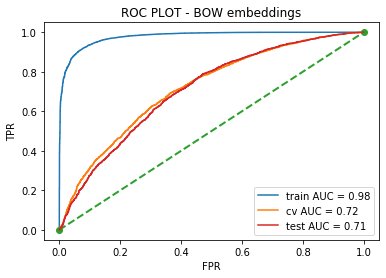

In [170]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

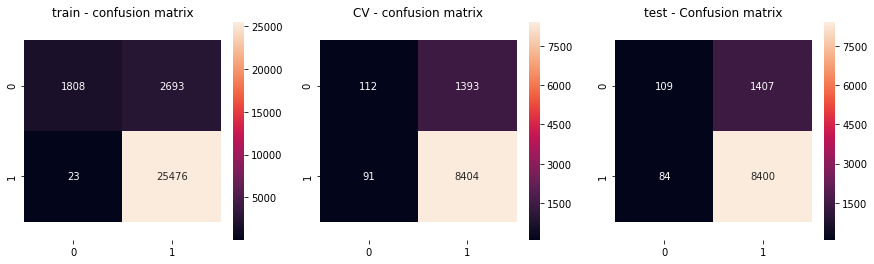

In [174]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, xgb_model3.predict(X_train_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')
axs[0].set_ylim(len(df_cm)+0.2, -0.2)

#cv data
data = confusion_matrix(y_val, xgb_model3.predict(X_val_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')
axs[1].set_ylim(len(df_cm)+0.2, -0.2)

#test data
data = confusion_matrix(y_test, xgb_model3.predict(X_test_set3))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')
axs[2].set_ylim(len(df_cm)+0.2, -0.2)

plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation
X_train_set4 = X_train_set4.tocsr()[:30000]
X_val_set4 = X_val_set4.tocsr()[:10000]
X_test_set4 = X_test_set4.tocsr()[:10000]

print("x_train {0} | y_train {1} ".format(X_train_set4.shape, y_train.shape))
print("x_val {0} | y_train {1} ".format(X_val_set4.shape, y_val.shape))
print("x_test  {0} | y_test  {1} ".format(X_test_set4.shape, y_test.shape))

x_train (30000, 213) | y_train (30000,) 
x_val (10000, 213) | y_train (10000,) 
x_test  (10000, 213) | y_test  (10000,) 


#### 2.5.4.1 Finding optimal hyperparameters on set4

In [0]:
%%time
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
xgb_train_scores4=[]
xgb_val_scores4=[]
for estimator in tqdm(parameters["n_estimators"]):
    for depth in parameters["max_depth"]:
        xgb_model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth)
        xgb_model.fit(X_train_set4 , y_train)
        
        y_train_pred = xgb_model.predict(X_train_set4)
        y_val_pred = xgb_model.predict(X_val_set4)
        
        xgb_train_scores4.append(roc_auc_score(y_train,y_train_pred))
        xgb_val_scores4.append(roc_auc_score(y_val,y_val_pred))
    print( xgb_train_scores4,"|", xgb_val_scores4)

 12%|█▎        | 1/8 [01:34<11:01, 94.44s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958] | [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317]


 25%|██▌       | 2/8 [08:00<18:12, 182.03s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786] | [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.5009548317458579, 0.5001138054630533, 0.5011693413557712, 0.501947598646067, 0.5023386827115423, 0.5044249206588202]


 38%|███▊      | 3/8 [20:38<29:33, 354.74s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688] | [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.5009548317458579, 0.5001138054630533, 0.5011693413557712, 0.501947598646067, 0.5023386827115423, 0.5044249206588202, 0.5002733677617672, 0.5007612451334476, 0.5007782572902958, 0.5017330890361538, 0.5039998122796485, 0.5029992236981301, 0.5035211253835068, 0.5051613319541102, 0.5083658747866148]


 50%|█████     | 4/8 [39:28<39:09, 587.39s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291] | [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.5009548317458579, 0.5001138054630533, 0.5011693413557712, 0.501947598646067, 0.5023386827115423, 0.5044249206588202, 0.5002733677617672, 0.5007612451334476, 0.5007782572902958, 0.501733089

 62%|██████▎   | 5/8 [1:04:39<43:13, 864.36s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291, 0.5029927682340728, 0.5117946825573941, 0.533071015614319, 0.5755452472797592, 0.67093583458309, 0.8008546915235966, 0.9393075945953908, 0.9843172054292217, 0.9937791601866253] | [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.50095483174

 75%|███████▌  | 6/8 [1:42:09<42:40, 1280.11s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291, 0.5029927682340728, 0.5117946825573941, 0.533071015614319, 0.5755452472797592, 0.67093583458309, 0.8008546915235966, 0.9393075945953908, 0.9843172054292217, 0.9937791601866253, 0.5057633636176679, 0.521524505506831, 0.5564122082792013, 0.6385835109791107, 0.782930559835939, 0.920625466543164, 0.98542806968161, 0.9938902466118641, 0.9983337036214175] | [0.5, 

 88%|████████▊ | 7/8 [2:44:13<33:33, 2013.27s/it]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291, 0.5029927682340728, 0.5117946825573941, 0.533071015614319, 0.5755452472797592, 0.67093583458309, 0.8008546915235966, 0.9393075945953908, 0.9843172054292217, 0.9937791601866253, 0.5057633636176679, 0.521524505506831, 0.5564122082792013, 0.6385835109791107, 0.782930559835939, 0.920625466543164, 0.98542806968161, 0.9938902466118641, 0.9983337036214175, 0.510716

In [0]:
# %%time
# parameters = {"n_estimators":[1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]}
# for estimator in tqdm(parameters["n_estimators"]):
#     for depth in parameters["max_depth"]:
#         xgb_model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth)
#         xgb_model.fit(X_train_set4 , y_train)
        
#         y_train_pred = xgb_model.predict(X_train_set4)
#         y_val_pred = xgb_model.predict(X_val_set4)
        
#         xgb_train_scores4.append(roc_auc_score(y_train,y_train_pred))
#         xgb_val_scores4.append(roc_auc_score(y_val,y_val_pred))
#     print( xgb_train_scores4,"|", xgb_val_scores4)

100%|██████████| 1/1 [1:47:35<00:00, 6455.80s/it]

[0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.5009548317458579, 0.5001138054630533, 0.5011693413557712, 0.501947598646067, 0.5023386827115423, 0.5044249206588202, 0.5002733677617672, 0.5007612451334476, 0.5007782572902958, 0.5017330890361538, 0.5039998122796485, 0.5029992236981301, 0.5035211253835068, 0.5051613319541102, 0.5083658747866148, 0.5008789614371557, 0.502342593552197, 0.5027297667770175, 0.5035080240673133, 0.503815416142777, 0.504808183042986, 0.507091918443329, 0.5085973965533761, 0.510922977948725, 0.5007023869815935, 0.5030449805337907, 0.5032725914598973, 0.5043621516663114, 0.5059225770875578, 0.5079499568829818, 0.5075000146656524, 0.5096490216054392, 0.5102925504351788, 0.5015224902668953, 0.5027677019313687, 0.5052620361009701, 0.5058427959382008, 0.5072057239063823, 0.5066930126965442, 0.5075549619768517, 0.5086275100264178, 0.5094685363092224

#### 2.5.4.2 a) Heatmaps of parameters v/s scores

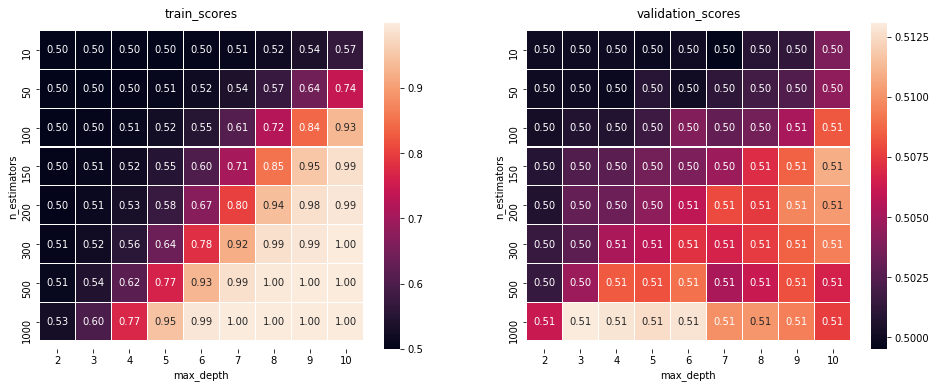

In [0]:
# plot a 3D plot (or) plot using heatmaps
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
t1= np.array(xgb_train_scores4).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t1 ,annot=True, ax=axs[0], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[0].set_title("train_scores")
axs[0].set_ylabel("n_estimators")
axs[0].set_xlabel("max_depth")
axs[0].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)

t2=np.array(xgb_val_scores4).reshape(len(parameters["n_estimators"]), len(parameters["max_depth"]))
sns.heatmap(t2 ,annot=True, ax=axs[1], yticklabels=parameters["n_estimators"], xticklabels=parameters["max_depth"], \
            linewidths=0.3, fmt='0.2f')
axs[1].set_title("validation_scores")
axs[1].set_ylabel("n_estimators")
axs[1].set_xlabel("max_depth")
axs[1].set_ylim(len(parameters["n_estimators"])+0.2, -0.2)

plt.show()

In [0]:
print(xgb_train_scores4)
print(xgb_val_scores4)
# xgb_train_scores4 = [0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291, 0.5029927682340728, 0.5117946825573941, 0.533071015614319, 0.5755452472797592, 0.67093583458309, 0.8008546915235966, 0.9393075945953908, 0.9843172054292217, 0.9937791601866253, 0.5057633636176679, 0.521524505506831, 0.5564122082792013, 0.6385835109791107, 0.782930559835939, 0.920625466543164, 0.98542806968161, 0.9938902466118641, 0.9983337036214175, 0.5107164702818349, 0.5439443547929734, 0.6171699176374686, 0.7653135135645199, 0.9305317670015227, 0.98542806968161, 0.9955369343783441, 0.9993334814485669, 0.9997778271495223, 0.5288496443252184,0.5991869601135039, 0.770854791461735, 0.9464824297643344, 0.9926682959342368, 0.9983337036214175, 0.9997778271495223, 0.9997778271495223, 0.9997778271495223]
# xgb_val_scores4 = [0.5, 0.5, 0.5, 0.49988228369629195, 0.5001347284605562, 0.4995082117876648, 0.5009718439027061, 0.5012622238213215, 0.5038193269834317, 0.5, 0.5, 0.49988228369629195, 0.5009548317458579, 0.5001138054630533, 0.5011693413557712, 0.501947598646067, 0.5023386827115423, 0.5044249206588202, 0.5002733677617672, 0.5007612451334476, 0.5007782572902958, 0.5017330890361538, 0.5039998122796485, 0.5029992236981301, 0.5035211253835068, 0.5051613319541102, 0.5083658747866148, 0.5008789614371557, 0.502342593552197, 0.5027297667770175, 0.5035080240673133, 0.503815416142777, 0.504808183042986, 0.507091918443329, 0.5085973965533761, 0.510922977948725, 0.5007023869815935, 0.5030449805337907, 0.5032725914598973, 0.5043621516663114, 0.5059225770875578, 0.5079499568829818, 0.5075000146656524, 0.5096490216054392, 0.5102925504351788, 0.5015224902668953, 0.5027677019313687, 0.5052620361009701, 0.5058427959382008, 0.5072057239063823, 0.5066930126965442, 0.5075549619768517, 0.5086275100264178, 0.5094685363092224, 0.5014597212743865, 0.5047950817267925, 0.5083998991003111, 0.5082024016472461, 0.5090146832512382, 0.5052594940545445, 0.506201224484209, 0.5081147988165796, 0.5066511667015383, 0.5062246895281375, 0.5130929078860146, 0.5128457427566342, 0.5126063993085634, 0.5127999859209736, 0.5099616933157867, 0.5101631016095065, 0.509477726784761, 0.5076020876067415]

[0.5, 0.5, 0.5, 0.501333037102866, 0.5039991113085981, 0.509200564682721, 0.5212697678095493, 0.5381941216700571, 0.5700170998772958, 0.5, 0.5, 0.503332592757165, 0.5083118732808103, 0.5177542194261113, 0.538024209408511, 0.5741665148353374, 0.644150962735804, 0.7439065726002786, 0.5006469099393306, 0.5041036324864612, 0.5112850329027806, 0.5240403631931443, 0.5524262274653546, 0.6103610808510955, 0.7234274531321279, 0.8416038009741468, 0.9321065855669688, 0.5020518162432306, 0.5082987427860587, 0.520505206197604, 0.5495706323859741, 0.6026372916733085, 0.7060783621827671, 0.8529542249606104, 0.9519322298484132, 0.9857809375694291, 0.5029927682340728, 0.5117946825573941, 0.533071015614319, 0.5755452472797592, 0.67093583458309, 0.8008546915235966, 0.9393075945953908, 0.9843172054292217, 0.9937791601866253, 0.5057633636176679, 0.521524505506831, 0.5564122082792013, 0.6385835109791107, 0.782930559835939, 0.920625466543164, 0.98542806968161, 0.9938902466118641, 0.9983337036214175, 0.510716

#### 2.5.4.3 Running XGBoost with best params on features(set4)

In [0]:
best_n_estimators = 300
best_max_depth = 5

In [0]:
%%time 
xgb_model4 = xgb.XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=28)
xgb_model4.fit(X_train_set4, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, xgb_model4.predict_proba(X_train_set4)[:,1])
val_fpr, val_tpr, thresholds = roc_curve(y_val, xgb_model4.predict_proba(X_val_set4)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb_model4.predict_proba(X_test_set4)[:,1])

CPU times: user 2min 54s, sys: 145 ms, total: 2min 54s
Wall time: 2min 54s


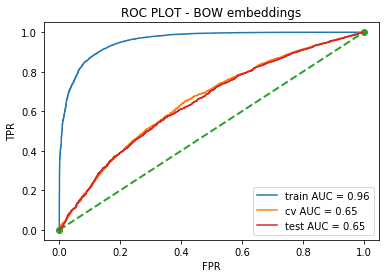

In [0]:
plt.plot(train_fpr, train_tpr, label="train AUC = %0.2f"% auc(train_fpr, train_tpr))
plt.plot(val_fpr, val_tpr, label="cv AUC = %0.2f"%auc(val_fpr, val_tpr))
plt.plot([0,1],[0,1], marker='o', linestyle='dashed', linewidth=2)
plt.plot(test_fpr, test_tpr, label="test AUC = %0.2f"%auc(test_fpr, test_tpr))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT - BOW embeddings")
plt.show()

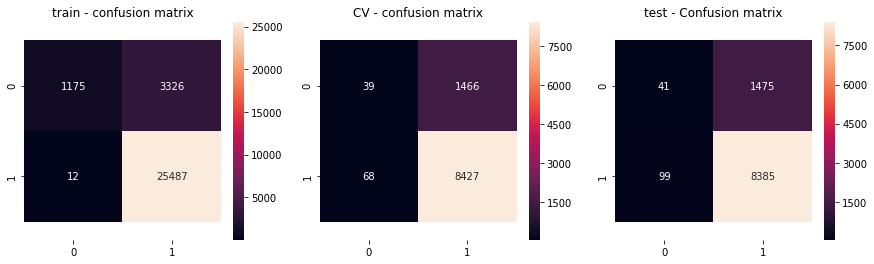

In [0]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

fig, axs = plt.subplots(ncols=3, figsize=(15,4))
#train data
data = confusion_matrix(y_train, xgb_model4.predict(X_train_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[0].set_title("train - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[0], fmt='d')
axs[0].set_ylim(len(df_cm)+0.2, -0.2)

#cv data
data = confusion_matrix(y_val, xgb_model4.predict(X_val_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[1].set_title("CV - confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[1], fmt='d')
axs[1].set_ylim(len(df_cm)+0.2, -0.2)

#test data
data = confusion_matrix(y_test, xgb_model4.predict(X_test_set4))
df_cm = pd.DataFrame(data, columns=[0,1], index = [0,1])
axs[2].set_title("test - Confusion matrix")
sns.heatmap(df_cm, annot=True,ax=axs[2], fmt='d')
axs[2].set_ylim(len(df_cm)+0.2, -0.2)

plt.show()

# 3. Conclusion

In [172]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
pt = PrettyTable(["Embedding","n_estimators","max_depth","Train AUC","Validation AUC","Test AUC"])
pt.add_row(["BOW", 200, 8, 0.78, 0.71, 0.70])
pt.add_row(["TFIDF", 300, 9, 0.81, 0.72, 0.70])
pt.add_row(["Avg Word2Vec", 150, 6,  0.77, 0.71, 0.70])
pt.add_row(["TFIDF-W2V", 150, 6, 0.73, 0.66, 0.65])
print(pt)

+--------------+--------------+-----------+-----------+----------------+----------+
|  Embedding   | n_estimators | max_depth | Train AUC | Validation AUC | Test AUC |
+--------------+--------------+-----------+-----------+----------------+----------+
|     BOW      |     200      |     8     |    0.78   |      0.71      |   0.7    |
|    TFIDF     |     300      |     9     |    0.81   |      0.72      |   0.7    |
| Avg Word2Vec |     150      |     6     |    0.77   |      0.71      |   0.7    |
|  TFIDF-W2V   |     150      |     6     |    0.73   |      0.66      |   0.65   |
+--------------+--------------+-----------+-----------+----------------+----------+


In [173]:
pt2 = PrettyTable(["Embedding","n_estimators","max_depth","Train AUC","Validation AUC","Test AUC"])
pt2.add_row(["BOW", 300, 6, 0.96,0.74, 0.73])
pt2.add_row(["TFIDF", 200, 6, 0.96, 0.74, 0.73])
pt2.add_row(["Avg Word2Vec", 150, 6, 0.98, 0.72, 0.71])
pt2.add_row(["TFIDF-W2V", 300, 5, 0.96, 0.65, 0.65])
print(pt2)

+--------------+--------------+-----------+-----------+----------------+----------+
|  Embedding   | n_estimators | max_depth | Train AUC | Validation AUC | Test AUC |
+--------------+--------------+-----------+-----------+----------------+----------+
|     BOW      |     300      |     6     |    0.96   |      0.74      |   0.73   |
|    TFIDF     |     200      |     6     |    0.96   |      0.74      |   0.73   |
| Avg Word2Vec |     150      |     6     |    0.98   |      0.72      |   0.71   |
|  TFIDF-W2V   |     300      |     5     |    0.96   |      0.65      |   0.65   |
+--------------+--------------+-----------+-----------+----------------+----------+
